In [1]:
import pandas as pd
import pyodbc
import numpy as np
from keras.layers import Embedding
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt



Using TensorFlow backend.


In [2]:
def getData(Server, Database, query):    
    sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                          'SERVER='+Server+';' 
                          'DATABASE='+Database+';' 
                          'Trusted_Connection=yes')
    
    return pd.read_sql(query, sql_conn, index_col ="examCode")

In [3]:
def generateLabelsList(df):
    return np.hsplit(df,2)

In [4]:
def generateWordIndex(df):
    return df.sectionValue.str.split(expand=True).stack().value_counts()

In [5]:
def generateReport(word_index, label):
    print(word_index[:25])
    x = np.arange(len(word_index[:25]))
    plt.bar(x, height= word_index.values[:25])
    plt.xticks(x, word_index.index[:25], rotation=80)
    
    plt.title(label)
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()
    
    

In [6]:
query = "SELECT examCode, sectionValue FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE (ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS') AND (ResultSection.sectionValue <>' ') AND examCode not in ( select examCode FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE (ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS') AND (ResultSection.sectionValue <>' ') group by examCode having COUNT(examCode) < 100 ) ORDER BY examCode"
server ='GESTALT-BT41Q'
database = 'MClinical'
data = getData(server,database,query)
query = "SELECT DISTINCT examCode FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE (ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS') AND (ResultSection.sectionValue <>' ') AND examCode not in ( select examCode FROM [MClinical].[dbo].[Result] LEFT JOIN ResultSection ON Result.resultKey = ResultSection.resultKey left join mapResultRequestedProcedure ON Result.resultKey = mapResultRequestedProcedure.resultKey left join RequestedProcedure ON mapResultRequestedProcedure.requestedProcedureKey = RequestedProcedure.requestedProcedureKey left join FillerOrder ON RequestedProcedure.fillerOrderKey = FillerOrder.fillerOrderKey left join PlacerOrder ON FillerOrder.placerOrderKey = PlacerOrder.placerOrderKey left join ExamCode ON PlacerOrder.examCodeKey = ExamCode.examCodeKey WHERE (ResultSection.sectionCategory = 'FINAL PATHOLOGIC DIAGNOSIS') AND (ResultSection.sectionValue <>' ') group by examCode having COUNT(examCode) < 100 ) ORDER BY examCode"
unique_labels = getData(server,database,query)

+CDH 

only          764
No            764
technical     764
performed     764
diagnosis;    764
NO              1
IS              1
IDENTIFIED      1
IN              1
SPECIMEN        1
THE             1
CONTAINER.      1
dtype: int64


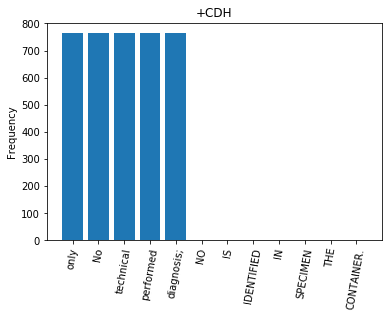



+KBR 

performed              345
No                     345
diagnosis;             345
technical              345
only                   345
-                        2
and                      2
Skin,                    2
biopsy:                  2
telangiectatic           1
at                       1
Mildly                   1
acral                    1
elastic                  1
punch                    1
for                      1
margin.                  1
shave                    1
Webb,                    1
medial                   1
neck,                    1
Received                 1
present                  1
Dermatopathologist.      1
nevus;                   1
dtype: int64


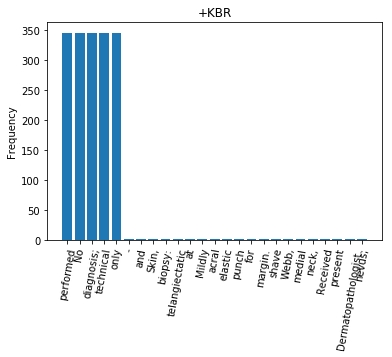



+RMS 

only          117
No            117
technical     117
performed     117
diagnosis;    117
dtype: int64


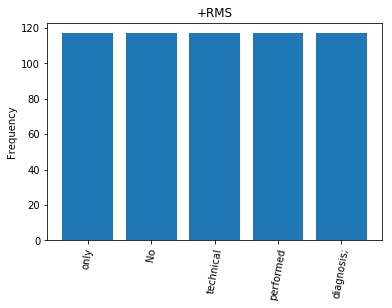



+RSH 

No                     985
only                   985
technical              985
diagnosis;             985
performed              985
-                       19
Skin,                   16
and                     14
biopsy:                 12
been                    11
with                    11
has                     11
This                    11
by                      11
reviewed                11
case                    10
at                      10
dictated                10
shave                   10
Dermatopathologist.     10
D.O.,                    8
Alden                    8
Board-Certified          8
R.                       8
Webb,                    8
dtype: int64


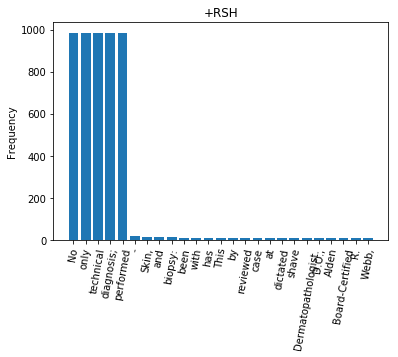



+SKO1 

only          525
No            525
technical     525
performed     525
diagnosis;    525
dtype: int64


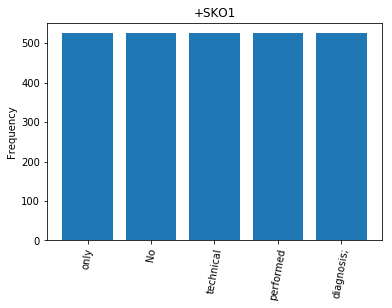



+SLD 

only          394
No            394
performed     394
technical     394
diagnosis;    394
dtype: int64


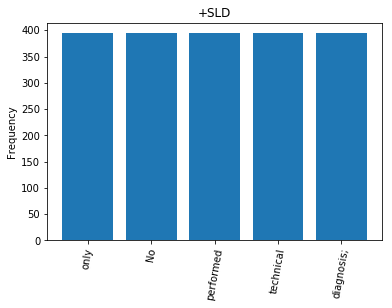



ANT-BX 

-               3017
for             1441
Negative        1215
with             986
biopsy:          932
mucosa           718
and              717
or               709
intestinal       594
chronic          525
malignancy.      502
antrum,          464
dysplasia        450
Stomach,         431
Gastric          431
by               406
B.               397
A.               396
pylori           380
gastric          366
metaplasia,      316
Helicobacter     315
H.               304
Benign           260
metaplasia       255
dtype: int64


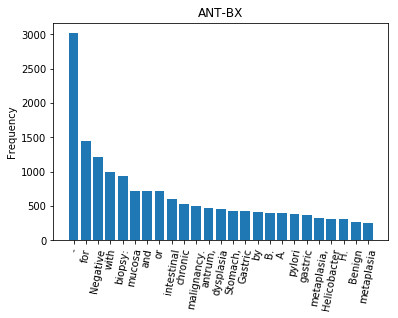



APPO 

-                    655
Appendix,            409
Acute                402
appendectomy:        385
appendicitis         235
and                  221
appendicitis.        200
with                 159
periappendicitis.    149
Appendix:             81
of                    70
acute                 68
suppurative           61
the                   57
JDM:dks               49
DS:mfr                48
JKK:dks               45
for                   39
MWD:jcc:C2NR          38
necrotizing           34
periappendicitis,     33
benign.               33
HMcC:dks              29
inflammation          28
periappendicitis      26
dtype: int64


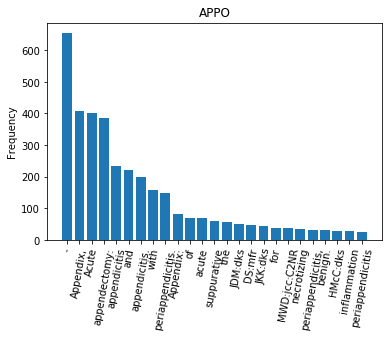



BONEF-O 

-                162
and              114
with             101
Bone              93
cartilage         81
degenerative      73
features.         65
contents:         58
knee              54
Right             51
IRG:glc:C2NR      36
Left              30
bone              25
present.          24
IRG:kec:C2NR      22
of                21
hematopoietic     20
tissue            19
left              19
Unremarkable      18
elements          16
excision:         13
Bone,             12
resection:        12
right             12
dtype: int64


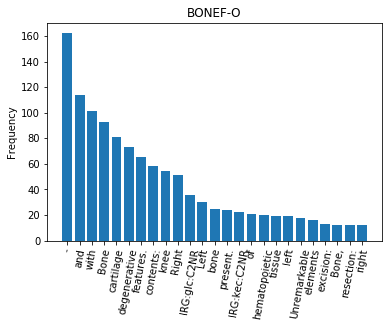



CL-ANT-BX 

-               1780
for              851
Negative         839
biopsy:          688
dysplasia.       517
with             443
or               443
metaplasia       390
intestinal       315
mucosa           299
chronic          299
A.               286
Stomach,         286
B.               286
Esophagus,       274
and              271
Barrett's        246
esophagitis      238
Helicobacter     229
pylori.          224
antrum,          224
atrophy,         215
cell             195
goblet           195
distal,          188
dtype: int64


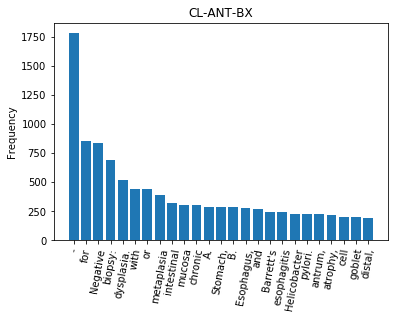



CL-COL-P 

-               1969
Colon,          1286
polypectomy:    1205
adenoma.        1068
Tubular          875
B.               430
A.               430
polyp.           332
"polyp":         317
Hyperplastic     285
colon            280
dysplasia.       279
C.               271
No               259
high-grade       232
descending,      205
serrated         193
biopsy,          181
for              165
D.               149
with             148
BMH:slh:C2NR     147
ascending,       145
Negative         144
hyperplastic     141
dtype: int64


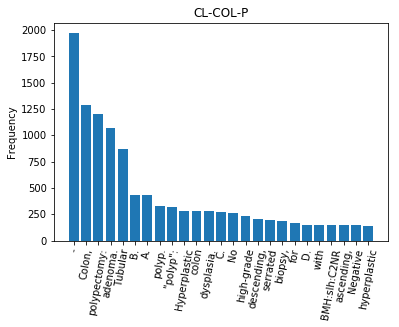



CL-COLBX 

-               921
Colon,          396
for             320
Negative        313
biopsy:         285
or              246
colonic         215
with            208
colitis.        182
dysplasia.      156
chronic         149
mucosa.         146
mucosa          144
A.              135
B.              135
polypectomy:    128
acute,          125
adenoma.        113
Benign          102
random,         102
colon            98
microscopic      96
Normal           89
inflammatory     87
C.               81
dtype: int64


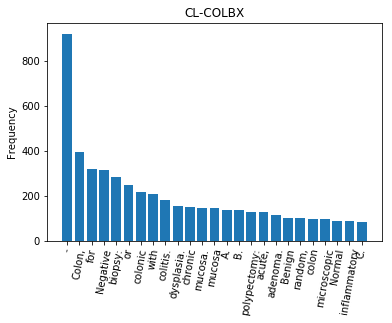



CL-DUOBX 

-                2384
for              1108
Negative         1098
biopsy:           952
or                763
with              545
dysplasia.        528
metaplasia        429
mucosa            407
inflammation,     391
intestinal        318
B.                314
A.                314
chronic           311
second            311
Duodenum,         307
mucosa.           302
C.                300
Stomach,          287
and               256
Helicobacter      243
portion,          240
Normal            238
Barrett's         233
Esophagus,        231
dtype: int64


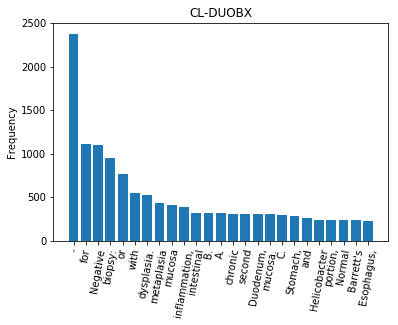



CL-SIG-P 

-               264
Colon,          168
polypectomy:    164
adenoma.        105
polyp.          100
Hyperplastic     97
Tubular          84
sigmoid,         79
colon            52
B.               45
A.               45
Sigmoid          41
"polyp":         41
sigmoid          37
BMH:kec:C2NR     29
hyperplastic     26
BMH:slh:C2NR     23
BMH:caw:C2NR     22
biopsy,          22
BMH:glc:C2NR     21
C.               20
for              19
with             18
biopsy:          18
Negative         18
dtype: int64


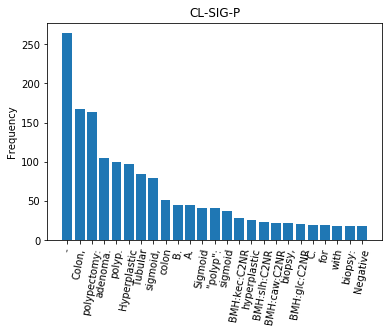



COL-P 

-               5840
adenoma.        1775
Tubular         1755
polypectomy:    1462
polyp,          1416
biopsy:         1398
of              1331
A.              1156
B.              1153
for             1017
Colon            926
Colon,           918
colon            885
and              861
Negative         781
Fragments        754
polyp.           726
dysplasia        689
malignancy.      648
tubular          630
or               603
Hyperplastic     597
colon,           570
adenoma          561
polyp:           560
dtype: int64


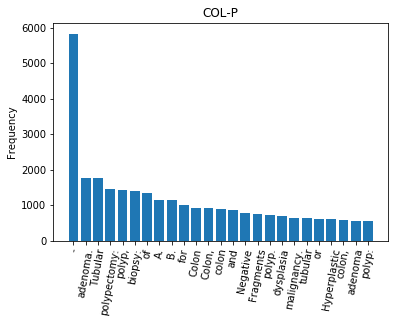



COLBX 

-              3023
for            1247
Negative       1043
biopsy:         917
with            655
or              602
and             593
Colon,          582
colonic         574
colitis.        510
of              502
mucosa          457
biopsies:       444
dysplasia       442
B.              390
A.              389
malignancy.     381
active          373
colon,          310
chronic         306
dysplasia.      296
Benign          258
mucosa.         244
No              244
colitis,        230
dtype: int64


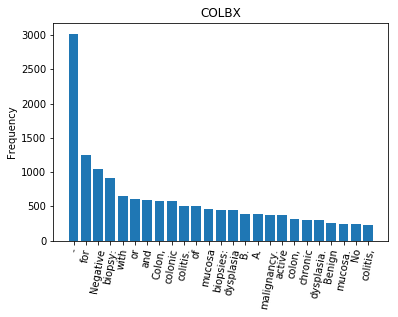



CON-SR 

and                    665
-                      611
by                     363
reviewed               339
case                   334
has                    331
This                   324
Skin,                  322
been                   322
Dermatopathologist.    321
dictated               310
biopsy:                299
with                   276
the                    255
of                     241
Board-Certified        237
D.O.,                  236
Alden                  236
R.                     236
Webb,                  236
is                     234
shave                  229
at                     225
COMMENT:               171
lateral                169
dtype: int64


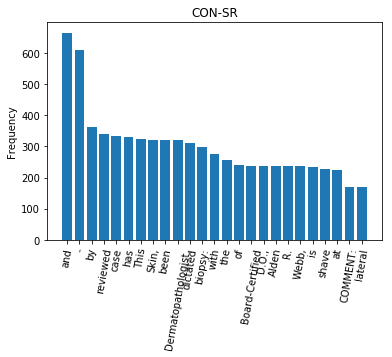



CON-SRP 

and                    347
-                      271
of                     213
reviewed               186
by                     185
is                     170
case                   169
with                   164
This                   161
has                    160
been                   159
Dermatopathologist.    148
dictated               146
biopsy:                145
Skin,                  145
the                    143
shave                  130
R.                     114
Board-Certified        114
Alden                  114
Webb,                  114
D.O.,                  114
COMMENT:               107
are                    104
a                       90
dtype: int64


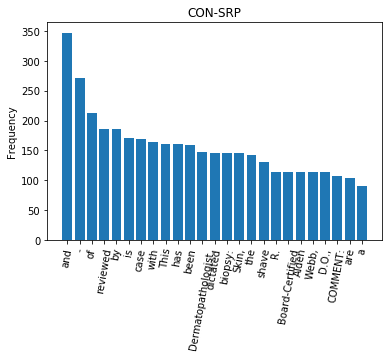



CXBX 

-                  1022
and                 401
squamous            371
of                  287
dysplasia           271
biopsy:             258
with                248
endocervical        221
B.                  221
A.                  219
(CIN                200
Cervix,             190
intraepithelial     178
for                 171
grade               162
lesion              153
curettings:         126
Endocervical        120
identified.         113
benign              112
See                 111
glandular           109
Endocervix,         104
Cervical            100
No                   98
dtype: int64


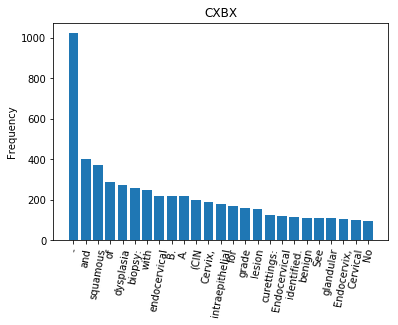



CXBX1 

-                  418
biopsy:            178
squamous           157
dysplasia          129
1                  123
Cervix,            123
o'clock,           112
and                105
A.                  99
B.                  99
with                97
endocervical        94
for                 89
at                  79
(CIN                79
of                  74
intraepithelial     71
C.                  54
Endocervical        54
o'clock             53
grade               49
curettings:         49
1).                 48
Benign              47
Negative            45
dtype: int64


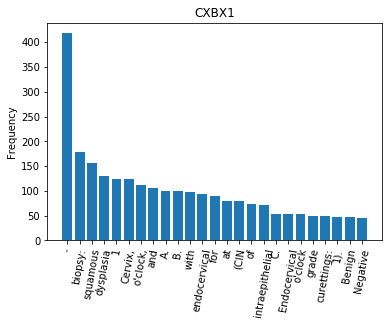



CXBX11 

-                  337
biopsy:            133
squamous           116
dysplasia          103
Cervix,             97
(CIN                83
of                  81
A.                  76
B.                  76
o'clock,            75
and                 73
endocervical        68
11                  68
with                64
for                 56
intraepithelial     52
grade               48
lesion              48
curettings:         44
at                  42
1).                 35
dysplasia).         35
Negative            34
dysplasia.          34
C.                  33
dtype: int64


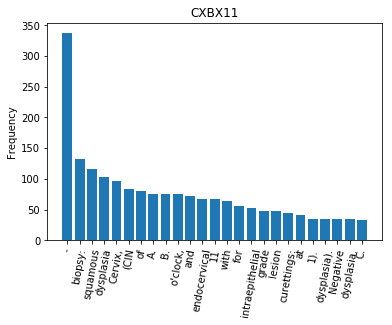



CXBX12 

-                  897
biopsy:            330
squamous           320
dysplasia          215
of                 199
B.                 194
A.                 193
and                188
Cervix,            188
with               186
(CIN               182
at                 180
for                168
endocervical       161
12                 161
intraepithelial    157
o'clock,           156
lesion             141
grade              134
Cervix             121
identified.         94
benign              93
C.                  91
curettings:         91
dysplasia.          85
dtype: int64


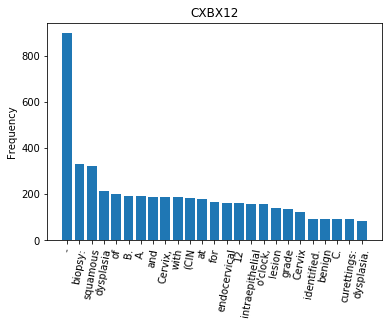



CXBX6 

-                  832
biopsy:            316
squamous           316
dysplasia          207
of                 200
and                194
with               191
Cervix,            186
B.                 183
A.                 182
(CIN               172
endocervical       165
for                161
o'clock,           157
6                  153
intraepithelial    149
at                 146
lesion             141
grade              112
C.                 106
Negative           101
dysplasia.          98
1).                 98
curettings:         89
benign              87
dtype: int64


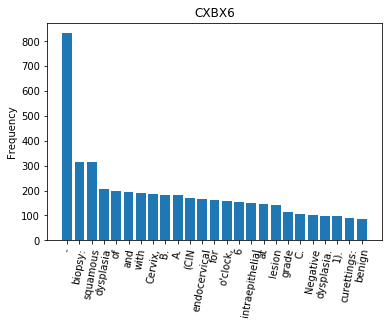



CXCONE 

-                  1217
squamous            355
and                 309
dysplasia           303
of                  303
endocervical        286
(CIN                265
for                 241
with                221
LEEP                206
dysplasia.          201
Cervix,             198
the                 195
intraepithelial     183
B.                  175
A.                  174
lesion              161
grade               147
is                  147
to                  132
negative            126
margins             112
are                 104
Negative            101
biopsy:             101
dtype: int64


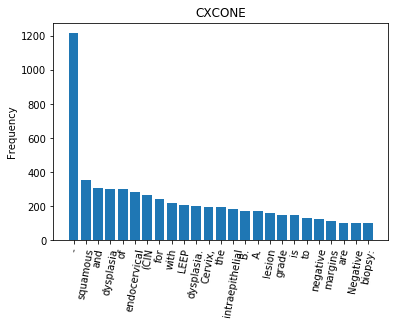



CXPOLYP 

-               522
endocervical    217
Benign          189
polyp,          183
Cervical        181
of              143
biopsy:         136
with            125
polyp.          123
and             122
or              109
polyp           105
for             104
malignancy.      99
dysplasia        96
glandular        90
Cervix,          87
polypectomy:     74
polyp:           67
No               64
squamous         60
Negative         56
identified.      48
atypia           48
evidence         47
dtype: int64


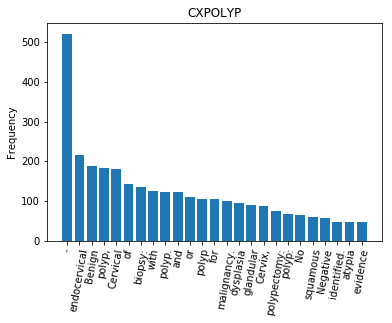



CYST 

-             276
with          111
and            85
excision:      83
cyst.          80
Benign         68
cyst           55
of             52
Right          47
Left           43
cyst,          36
or             34
tissue,        30
for            30
left           28
Soft           28
A.             28
consistent     27
inclusion      26
JDM:dks        25
No             24
ovarian        23
Negative       21
atypia         21
cyst:          21
dtype: int64


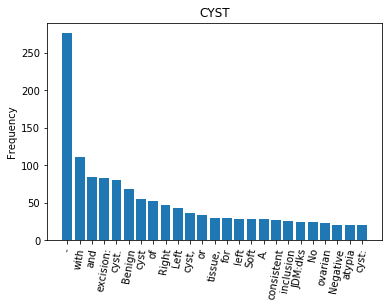



DUOBX 

-               4057
for             1864
Negative        1547
biopsy:         1456
with             975
or               827
mucosa           740
B.               590
A.               588
and              560
of               546
Duodenum,        542
malignancy.      453
chronic          411
intestinal       408
duodenal         397
Benign           396
biopsies:        378
C.               356
mucosa.          336
No               332
dysplasia        329
diagnostic       300
abnormality.     292
gastric          288
dtype: int64


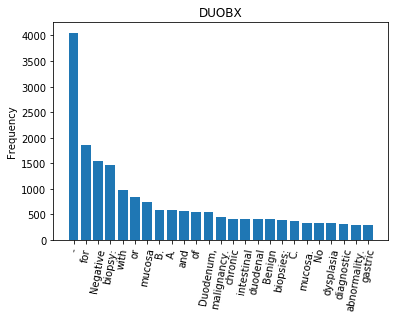



ECC 

-                  2709
of                  936
squamous            861
and                 778
endocervical        719
with                614
dysplasia           608
biopsy:             580
for                 562
A.                  512
B.                  512
curettings:         481
Endocervical        443
Endocervix,         412
(CIN                382
benign              373
intraepithelial     335
Cervix,             328
glandular           324
grade               315
No                  299
or                  297
fragments           287
malignancy.         286
identified.         285
dtype: int64


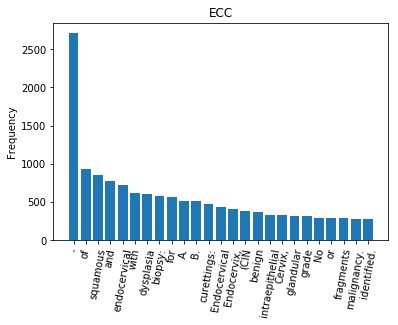



EMBX1 

-                4958
biopsy:          2478
of               1823
Endometrial      1466
or               1422
endometrial      1249
for              1239
and              1219
with             1197
Endometrium,     1060
endometrium      1023
malignancy.       996
hyperplasia       978
Negative          827
proliferative     780
Benign            603
No                601
fragments         571
benign            567
without           565
atypia            536
endometrium.      533
hyperplasia,      502
glandular         473
cytologic         453
dtype: int64


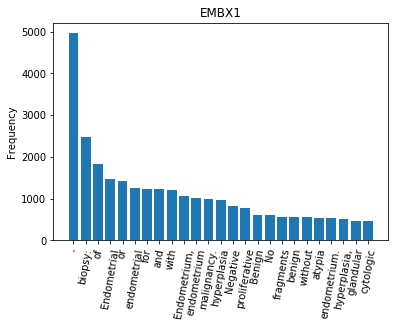



EMC1 

-                1054
of                406
curettings:       264
or                257
with              254
for               252
Endometrial       245
and               244
endometrial       218
Negative          197
malignancy.       177
endometrium       168
Endometrium,      166
hyperplasia       159
benign            158
proliferative     143
fragments         143
Benign            139
curettage:        128
atypia            110
Fragments         103
endocervical      103
endometrium.       99
No                 81
polyp.             76
dtype: int64


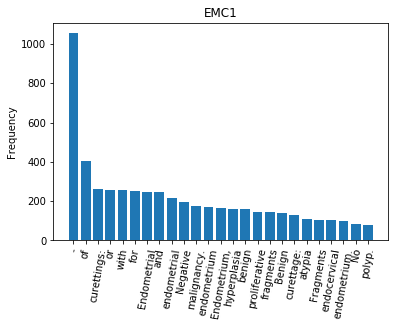



ESBX 

-               1912
for              820
with             684
Negative         628
biopsy:          597
mucosa           528
and              395
or               369
Esophagus,       353
dysplasia        296
Barrett's        292
malignancy.      291
dysplasia.       272
of               271
squamous         262
esophagus,       257
biopsies:        240
intestinal       216
A.               198
B.               197
chronic          179
cm,              165
Squamous         163
metaplasia       163
esophagitis.     155
dtype: int64


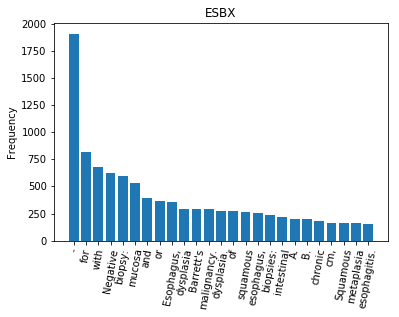



FAL2-ST 

fallopian         356
-                 258
Complete          151
tube              145
of                139
B.                122
cross             113
Right             107
Left              101
A.                100
tube,              98
tube.              82
with               71
unremarkable       71
sections           67
segment,           67
salpingectomy:     67
identified.        48
section            48
no                 43
pathologic         41
transection.       39
sterilization:     38
and                38
changes.           33
dtype: int64


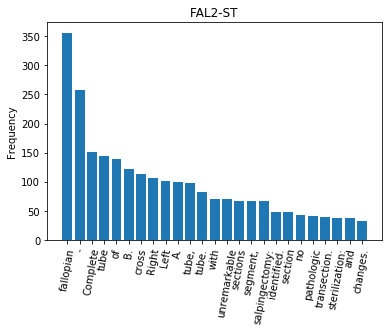



GALLB 

-                   2094
Gallbladder,         972
cholecystectomy:     892
Chronic              627
and                  578
cholecystitis.       484
cholecystitis        478
chronic              415
with                 411
Cholelithiasis.      255
cholelithiasis.      229
Cholelithiasis       186
Gallbladder:         173
Mild                 169
cholesterolosis.     149
No                   140
lymph                131
for                  127
DS:mfr               113
Negative             112
Acute                105
cholecystitis,        89
of                    85
Benign                84
node.                 80
dtype: int64


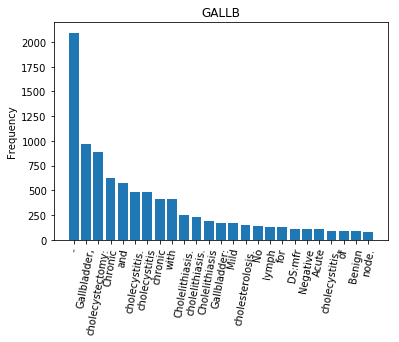



GANGC 

-                      181
cyst.                   78
with                    68
and                     63
excision:               62
ganglion                54
Soft                    54
tissue,                 53
Benign                  48
left                    44
tissue                  40
Ganglion                39
wrist,                  34
Right                   33
This                    32
by                      32
case                    31
reviewed                31
M.D.,                   31
Dermatopathologist.     31
has                     31
been                    31
dictated                31
right                   30
Left                    29
dtype: int64


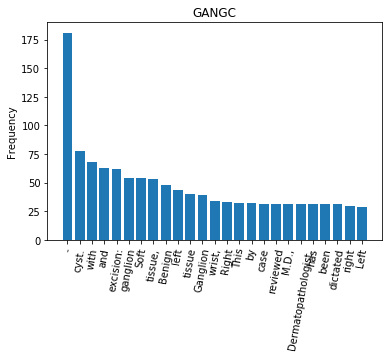



GAS-P 

-               497
for             193
Negative        174
biopsy:         126
with            115
or              101
Gastric          95
gland            87
mucosa           83
malignancy.      80
and              75
polyp.           74
dysplasia        71
of               70
A.               69
B.               67
intestinal       66
dysplasia.       65
polypectomy:     57
gastric          54
fundic           53
polyp,           52
Benign           48
biopsies:        48
C.               37
dtype: int64


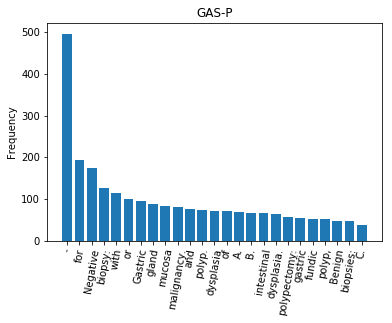



GBX 

-               2282
for             1128
Negative         971
biopsy:          685
with             610
or               531
mucosa           427
intestinal       423
Gastric          392
Helicobacter     372
chronic          354
and              334
malignancy.      299
pylori           278
B.               276
A.               276
gastric          273
dysplasia        269
dysplasia.       246
Stomach,         218
metaplasia       210
of               208
Benign           206
metaplasia,      198
by               192
dtype: int64


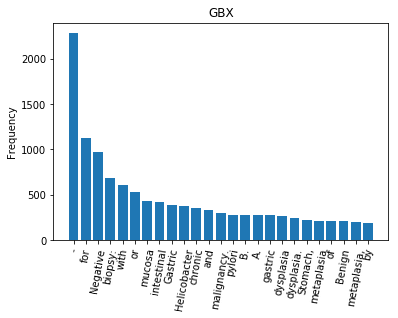



GEJUNC 

-                   903
for                 377
Negative            308
with                307
biopsy:             277
mucosa              254
and                 204
junction,           195
Gastroesophageal    155
intestinal          154
GE                  149
dysplasia.          147
or                  145
metaplasia          143
chronic             140
of                  114
squamous            113
A.                  101
B.                  101
Barrett's            98
malignancy.          92
Benign               88
gastric              87
dysplasia            83
mild                 80
dtype: int64


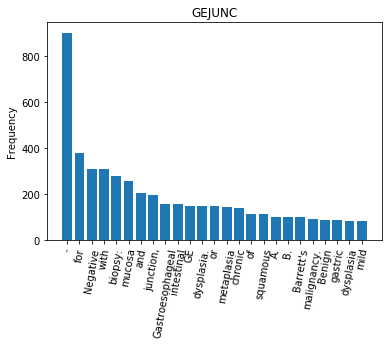



HEMO 

-                    328
with                 186
and                  120
hemorrhoidectomy:     91
Hemorrhoids,          82
Benign                72
or                    63
hemorrhoidal          61
mucosa                57
of                    57
hemorrhoids.          52
tissue,               45
dysplasia             45
No                    41
squamous              41
consistent            38
for                   37
Soft                  36
tissue                36
dilated               36
malignancy.           34
anorectal             34
chronic               34
associated            32
atypia                32
dtype: int64


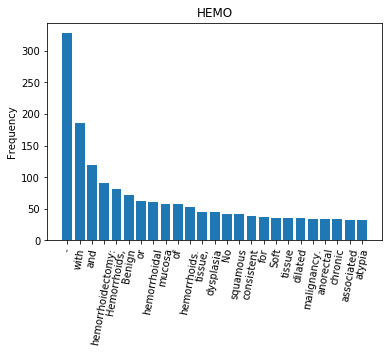



KAD-APPENDIX A 

-                    324
appendectomy:        170
Appendix,            170
Acute                122
with                 111
appendicitis         104
of                    76
neoplasia.            75
periappendicitis.     73
appendicitis.         61
for                   60
evidence              58
and                   56
No                    54
Negative              51
acute                 50
AMB:emb:C2NR          46
serositis             33
Benign                30
Marked                28
is                    28
present.              26
appendix              21
AMB:mdm:C2NR          14
comment.              13
dtype: int64


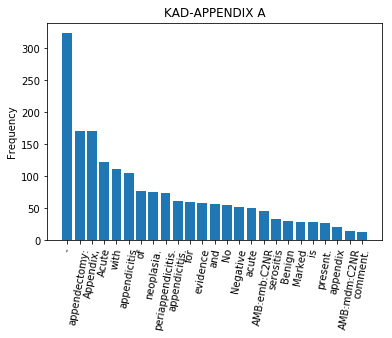



KAD-BRST NBX 

-            947
of           368
core         219
and          204
needle       192
biopsies:    187
the          147
with         146
score:       139
by           137
for          134
breast       124
�            114
Assurance    106
reviewed     106
was          106
Quality      106
InCyte       106
case         106
Program,     106
another      106
member       106
As           106
part         106
this         106
dtype: int64


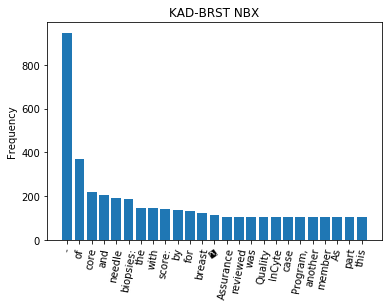



KAD-CECUM BX 

-              410
of             173
Colon,         128
biopsies:      118
adenoma.       102
or              99
evidence        97
No              95
dysplasia       77
grade           74
tubular         74
high            74
A.              71
malignancy.     71
adenoma         68
Tubular         67
biopsy:         62
polyp,          60
for             58
Negative        56
Multiple        55
B.              55
Cecal           49
colonic         40
cecum,          40
dtype: int64


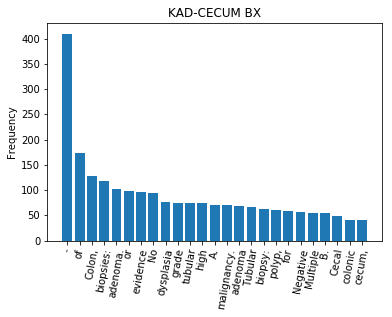



KAD-COL ASC BX 

-              559
of             220
biopsies:      175
Colon,         155
adenoma.       147
or             128
Tubular        121
No             114
evidence       109
tubular        106
dysplasia      104
adenoma        104
high            99
grade           99
A.              98
malignancy.     94
polyp,          91
B.              87
Ascending       83
biopsy:         73
for             72
Multiple        71
Negative        69
Fragments       62
ascending:      58
dtype: int64


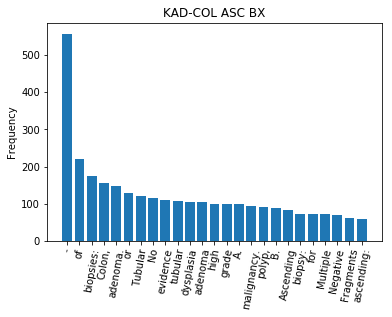



KAD-COL BX 

-               286
of              126
Colon,           89
adenoma.         78
biopsies:        77
Colon            77
at               73
polyp            73
cm,              71
Tubular          70
tubular          69
or               69
evidence         69
dysplasia        68
No               65
high             61
grade            61
adenoma          59
malignancy.      50
biopsy:          48
Multiple         43
AMB:emb:C2NR     35
polyps,          31
fragments        29
cm:              28
dtype: int64


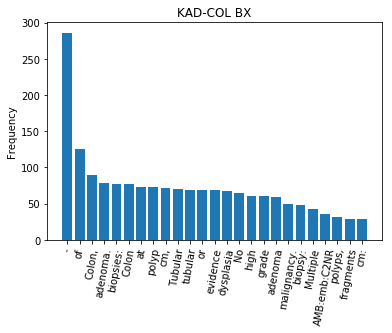



KAD-COL TRANS 

-              240
of              92
Colon,          80
No              59
dysplasia       58
biopsies:       56
adenoma         56
evidence        55
or              54
grade           51
high            50
Tubular         47
adenoma.        45
A.              41
tubular         41
Transverse      39
transverse:     39
malignancy.     36
B.              31
biopsy:         30
malignancy      29
transverse,     28
polyp,          28
Multiple        26
Negative        25
dtype: int64


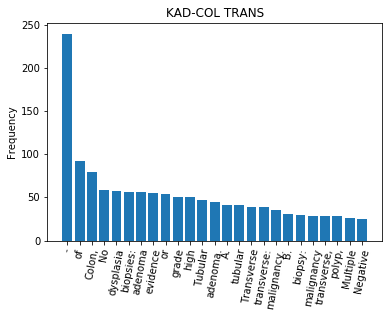



KAD-DUO BX 

-               641
biopsies:       260
for             242
Negative        226
Duodenum,       211
A.              194
or              183
biopsy:         140
with            139
No              124
active           87
significant      84
villous          75
Unremarkable     75
B.               75
blunting.        74
inflammation     73
acute            69
mucosa.          68
mucosa           67
Benign           65
abnormality      64
pathologic       63
gland            59
vascular         58
dtype: int64


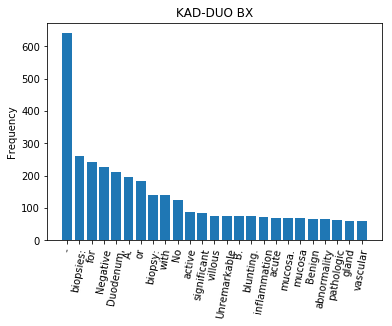



KAD-ECC 

-               277
endocervical    108
Endocervix,     102
fragments        88
of               86
curettage:       83
for              81
without          79
mucosa           68
A.               67
and              65
with             62
Benign           60
squamous         60
B.               45
glandular        45
Negative         44
biopsy:          41
dysplasia.       40
benign           39
atypical         38
Squamous         37
features         36
abnormality      36
present          29
dtype: int64


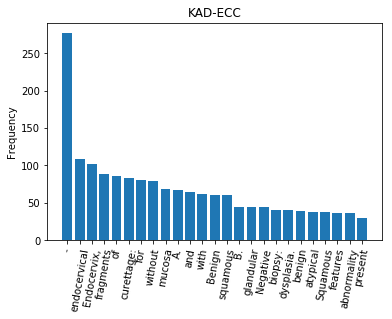



KAD-EM BX 

-                467
Endometrium,     158
biopsy:          151
or               141
endometrium      138
of               130
for              115
with             111
Negative         108
atypia           102
without          100
malignancy.       87
and               86
polyp             83
proliferative     79
AMB:emb:C2NR      76
Endometrium:      70
endometrial       70
hyperplasia       67
Proliferative     63
benign            61
phase             60
polyp,            59
Benign            58
stromal           54
dtype: int64


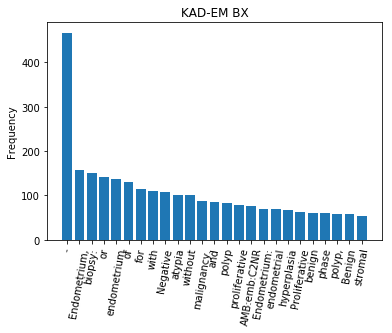



KAD-EMC 

-                252
with              87
of                86
Endometrium,      84
and               75
endometrium       72
for               63
or                62
Negative          59
endometrial       56
curettage:        51
without           49
atypia            46
malignancy.       45
stromal           45
benign            40
polyp             40
Benign            40
hyperplasia       39
phase             36
AMB:emb:C2NR      33
proliferative     33
curettings:       33
prominent         32
Proliferative     29
dtype: int64


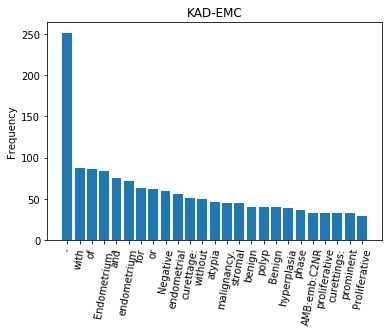



KAD-GASTRIC BX 

-                583
biopsies:        230
for              228
Negative         208
with             154
Stomach,         126
mucosa           102
A.               100
dysplasia         79
congestion.       79
vascular          78
Gastric           72
Benign            72
or                65
and               58
gastric           56
No                55
B.                55
inflammation.     51
Mild              50
biopsy:           50
AMB:emb:C2NR      49
gastritis         47
of                47
malignancy.       44
dtype: int64


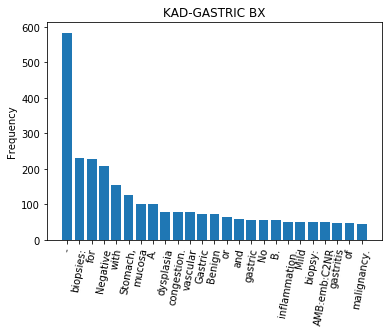



KAD-GB 

-                     661
Gallbladder,          298
cholecystectomy:      298
Chronic               239
cholecystitis         220
of                    168
with                  156
evidence              145
No                    143
neoplasia              90
AMB:emb:C2NR           86
and                    76
cholelithiasis.        75
Cholelithiasis         69
cholecystitis.         59
neoplasia.             54
Cholelithiasis.        47
cholelithiasis         45
present                45
sinuses                41
Rokitansky-Aschoff     40
cholesterolosis.       39
chronic                38
AMB:mdm:C2NR           35
lymph                  27
dtype: int64


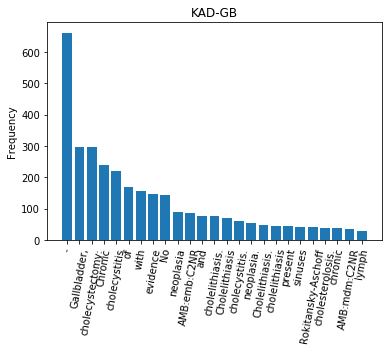



KAD-LUNG BX NEW 

-            141
biopsies:     90
for           61
See           53
comment.      50
core          44
with          42
lung,         39
lower         37
Lung,         37
lobe,         35
and           35
Right         34
CT-guided     33
upper         32
lobe          32
cell          31
needle        31
Negative      28
bronchial     27
of            26
tissue        26
right         25
Positive      24
Left          20
dtype: int64


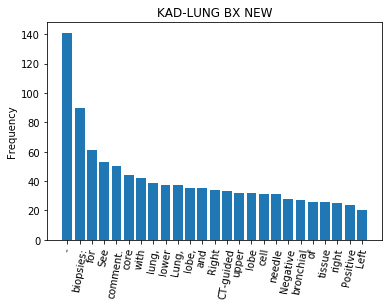



KAD-PLAC 3T 

-               1939
of               741
No               589
pathologic       499
for              493
gestational      491
with             475
age.             420
cord             395
umbilical        395
abnormality.     371
evidence         325
WITH             312
maturation       300
no               253
and              229
(see             218
FETAL            208
UMBILICAL        208
CORD             208
membranes        199
fetal            199
Fetal            198
grams),          197
villi            197
dtype: int64


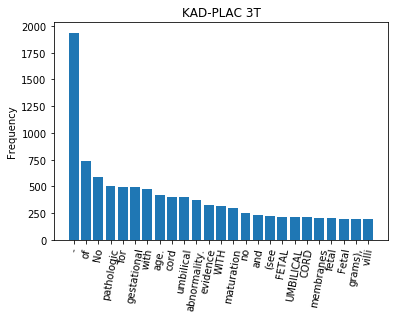



KAD-PLAC 3T GRS 

TERM             919
PLACENTA         919
AS               919
GROSSLY          919
CORD             919
AND              919
TRIVASCULAR      918
DESCRIBED.       916
GRAMS)           785
A.               702
UMBILICAL        251
g)                66
-                 62
fallopian         62
tube,             50
pathologic        38
of                37
No                35
B.                35
identified.       32
cross-section     28
ligation:         27
tubal             27
diagnosis,        26
Fallopian         26
dtype: int64


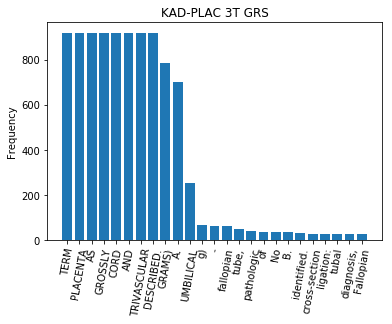



KAD-RECTAL BX 

-               198
of               65
Rectal           45
for              41
biopsies:        39
Rectum,          33
Negative         33
biopsy:          33
dysplasia        32
adenoma          32
or               30
Tubular          30
No               28
evidence         27
and              27
with             27
Hyperplastic     26
polyp,           25
polyp.           22
AMB:emb:C2NR     20
adenoma.         20
malignancy       20
grade            19
high             19
malignancy.      18
dtype: int64


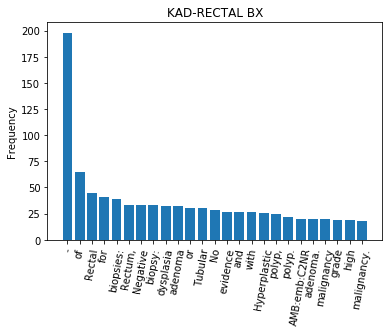



KAD-SIGMOID BX 

-               206
Sigmoid          63
of               62
Colon,           57
adenoma          50
biopsy:          47
Tubular          43
biopsies:        42
or               39
polyp,           39
Hyperplastic     38
dysplasia        36
evidence         36
for              34
sigmoid:         33
adenoma.         33
polyp.           33
AMB:emb:C2NR     32
Negative         32
grade            31
malignancy.      31
high             31
No               31
and              30
A.               21
dtype: int64


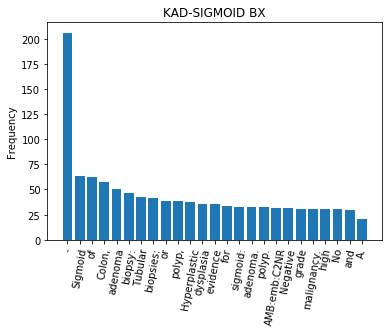



KAD-SK BX <1CM 

-              919
Skin,          491
and            296
of             269
biopsy:        245
the            245
left           234
with           212
right          208
to             183
carcinoma      164
cell           161
lesion         156
melanocytic    137
shave          136
at             135
present        134
extends        118
biopsy         116
The            116
by             106
This           102
for            100
Basal           99
base            99
dtype: int64


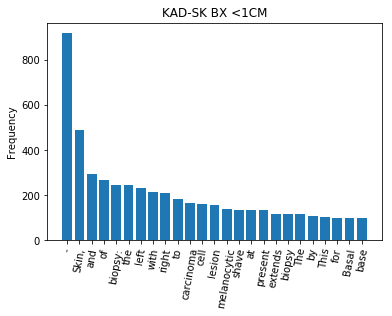



KAD-SK BX1 

-             423
Skin,         171
cell           95
with           92
left           91
excision:      90
and            88
of             82
right          77
carcinoma      71
to             52
the            50
Skin           49
for            48
in             45
present        44
residual       42
by             39
at             37
basal          36
Negative       35
biopsy         34
carcinoma,     34
upper          34
reviewed       33
dtype: int64


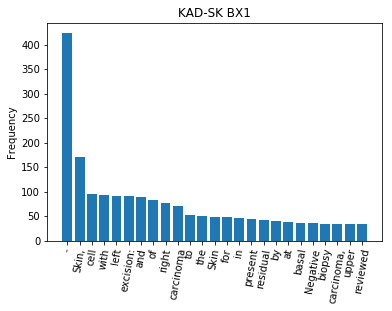



KAD-SOFT NOS 

-               285
with            125
excision:        99
tissue           95
and              92
mass,            76
consistent       49
right            46
Right            41
of               41
without          41
for              40
Benign           37
left             37
atypical         36
AMB:emb:C2NR     35
Negative         35
Soft             34
inflammation     34
features         30
adipose          29
cyst             27
Left             26
A.               26
lipoma.          25
dtype: int64


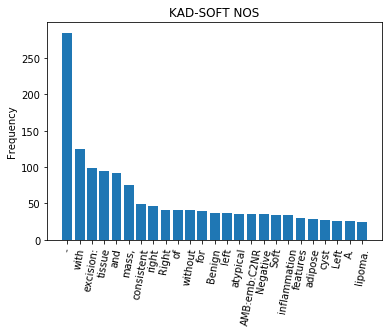



KAD-STONE RENAL 

OUTSIDE        147
SPECIMEN       147
FACILITY       147
BE             147
ANALYSIS.      147
WILL           147
FURTHER        147
CALCULI        147
THE            147
IDENTIFIED.    147
SENT           147
FOR            147
TO             147
CHEMICAL       147
AN             147
sent             9
analysis.        9
to               9
chemical         9
Calculi          9
further          9
will             9
an               9
be               9
The              9
dtype: int64


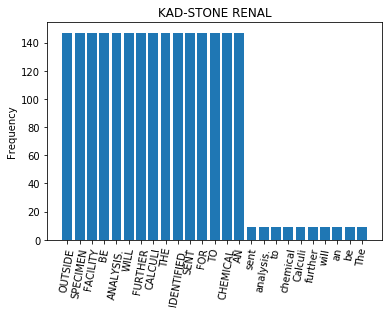



KAD-UT OV 

-                 653
and               276
with              180
fallopian         176
bilateral         137
Uterus             94
Benign             86
grams)             86
atypia             81
pathologic         74
salpingectomy:     73
hysterectomy       73
no                 72
tubes,             66
without            63
cysts.             62
endometrium        56
tubes              54
Myometrium         54
tubes.             53
benign             44
Proliferative      41
cm                 40
for                40
AMB:emb:C2NR       39
dtype: int64


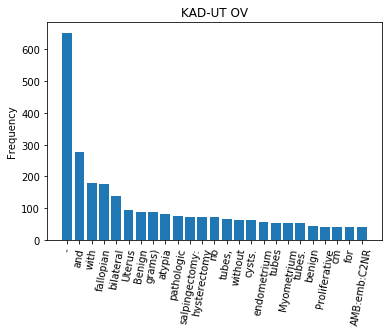



KIDST 

-            239
Stone        132
Calculi      130
analysis      94
to            75
pending.      73
material      73
present.      71
kidney        62
stone:        55
be            41
addendum.     40
as            40
Left          39
for           38
an            38
PAML          32
results       32
issued        32
Gross         32
Submitted     32
oxalate       31
analysis,     31
Calcium       30
calcium       29
dtype: int64


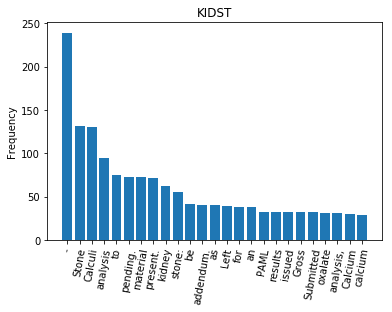



LABIA 

-              208
biopsy:         85
with            60
and             57
for             41
labia           39
Right           38
labia,          34
dysplasia       33
Skin,           33
Negative        31
of              30
chronic         28
squamous        28
Benign          27
or              25
Left            24
A.              21
malignancy.     19
case            19
reviewed        19
by              19
is              18
See             18
dictated        18
dtype: int64


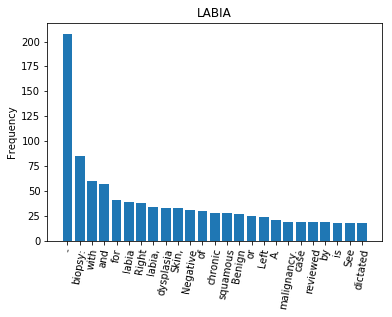



LIP-BX 

is             402
this           393
the            392
of             333
and            302
report         297
to             295
-              256
ICD-10         214
for            201
not            199
internal       196
provided       196
information    196
lip:           177
lower          121
or             109
been           105
a              101
with            99
was             99
additional      98
will            98
which           98
as              98
dtype: int64


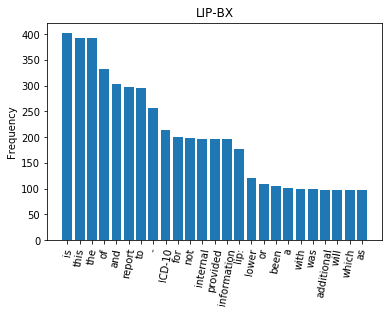



LIPOMA 

-                      333
tissue,                188
Soft                   153
excision:              147
with                   137
lipoma.                132
consistent             114
Benign                  91
tissue                  89
Lipoma.                 85
and                     77
adipose                 75
left                    71
right                   68
A.                      64
by                      51
dictated                50
case                    50
reviewed                50
has                     49
been                    49
This                    48
Dermatopathologist.     48
Board-Certified         44
Mature                  44
dtype: int64


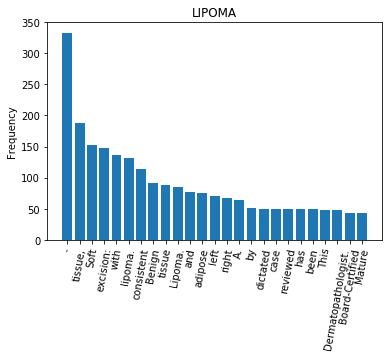



LIV-NBX 

-                388
with             163
of               142
biopsy:          127
fibrosis         118
needle           116
Liver,           112
and              112
hepatitis         99
activity          84
4                 81
Chronic           70
Metavir           70
for               69
(stage            61
mild              60
score             59
portal            59
(grade            56
Negative          55
Batts-Ludwig;     52
Liver             46
to                45
2                 44
grades,           39
dtype: int64


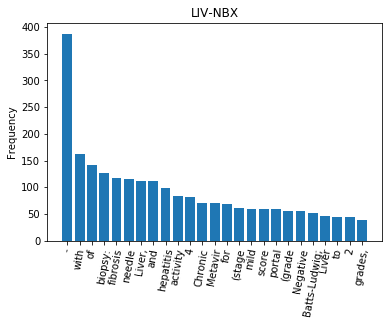



LUNG-BX 

-             208
biopsy:        74
with           57
lobe,          52
Lung,          46
upper          40
or             40
of             38
cell           38
for            37
and            34
No             33
Right          32
lower          29
biopsies:      26
carcinoma.     26
right          25
Left           25
lung           22
Negative       22
lobe           22
squamous       20
needle         20
left           19
is             18
dtype: int64


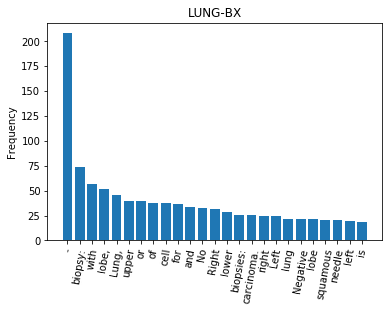



LYM-BX 

-              940
lymph          275
and            166
with           147
of             141
for            135
Tumor          107
node           106
node,           96
Lymph           92
the             84
benign          81
biopsy:         79
nodes           79
Left            69
Negative        62
A.              56
left            55
See             54
Right           54
invasion:       51
negative        51
anthracotic     49
B.              48
Benign          47
dtype: int64


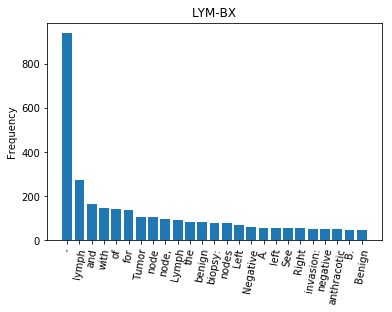



NAIL-PAF 

-                      192
by                      91
and                     81
PAS                     59
fungal                  58
nail                    53
been                    47
reviewed                47
case                    47
with                    47
dictated                47
has                     47
Dermatopathologist.     47
M.D.,                   47
This                    45
Nail                    40
ancillary               34
staining.               31
Comment).               31
(see                    29
Board-Certified         29
or                      28
Right                   28
A.                      27
PH:clv:C2NR             26
dtype: int64


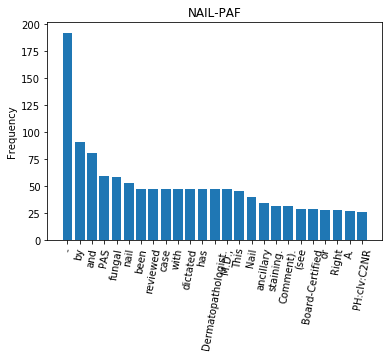



OE-COL-P 

-               1231
colon            657
polyp,           588
polypectomy:     569
Tubular          469
endoscopic       343
adenoma.         327
and              322
polyps,          321
Hyperplastic     266
biopsies:        245
of               242
polyp.           236
biopsy:          192
AG:clv:C2NR      182
LT:clv:C2NR      174
A.               165
Ascending        163
with             159
B.               158
sigmoid          157
Transverse       156
polyps.          150
hyperplastic     147
colon,           145
dtype: int64


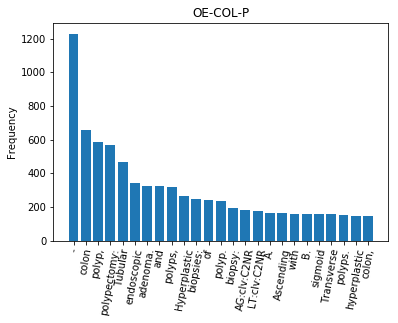



OE-COLBX 

-               425
with            192
biopsy:         139
mucosa          137
of              124
colon,          108
and             102
biopsies:        92
diagnostic       92
no               89
No               87
active           87
chronic          73
A.               73
B.               72
or               70
Colonic          68
endoscopic       67
abnormality.     64
colonic          57
for              49
Negative         49
colitis.         43
colon            42
bowel            41
dtype: int64


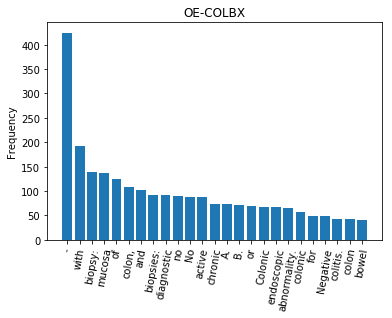



OE-DUOBX 

-               841
with            373
mucosa          307
biopsy:         294
for             200
Negative        184
diagnostic      180
no              173
and             169
biopsies:       163
endoscopic      159
B.              151
A.              150
No              149
chronic         141
Duodenum,       129
Duodenal        123
of              117
pylori          113
Gastric         110
abnormality.    104
C.              102
or               96
by               94
Stomach,         87
dtype: int64


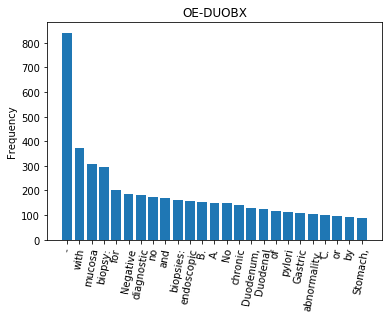



OE-STOMBX 

-             1319
for            468
Negative       427
with           414
biopsy:        336
and            328
mucosa         311
pylori         265
chronic        260
Gastric        252
by             225
B.             204
A.             204
No             201
endoscopic     193
biopsies:      193
or             189
dysplasia.     179
Stomach,       178
H.             149
antrum,        148
squamous       140
dysplasia      140
mild           137
of             134
dtype: int64


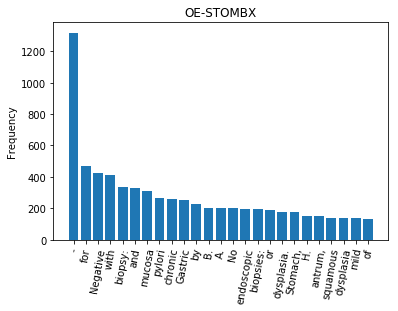



ORAL 

is             1754
the            1730
this           1711
of             1663
to             1333
report         1283
and            1187
-              1018
ICD-10          900
for             880
not             872
internal        854
information     854
provided        854
or              459
with            448
been            435
a               432
be              431
on              430
was             429
which           429
The             428
will            428
as              428
dtype: int64


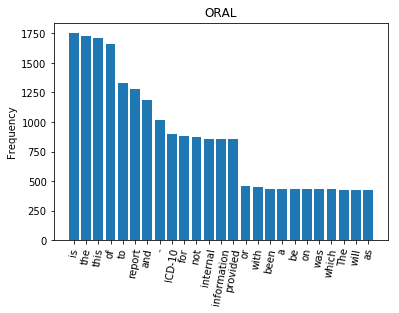



PLAC 

-                  1747
with                701
and                 500
umbilical           497
of                  460
placenta            393
cord                352
acute               331
the                 260
for                 257
inflammatory        248
chorionic           221
Mild                215
villous             206
mild                187
villi               176
placental           175
are                 173
trivascular         168
to                  161
INTERPRETATION:     157
showing:            157
trimester           151
maturation.         150
meconium            148
dtype: int64


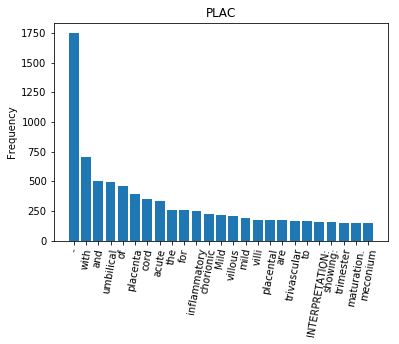



POC-S 

-              420
of             349
and            178
with           164
Products       161
contents:      144
Uterine        140
chorionic      128
villi           97
identified.     97
products        91
conception.     84
consistent      74
conception:     71
tissue          65
conception      65
decidua         62
are             51
No              44
Immature        41
villi,          36
DS:mfr          34
fetal           33
conception,     30
endometrium     30
dtype: int64


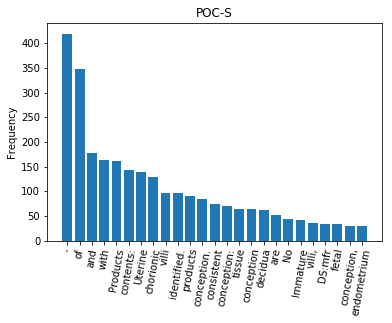



PROS2 

-             1023
of             474
core           286
with           230
prostatic      230
needle         186
biopsies:      178
Tumor          169
Prostate,      169
B.             160
the            156
A.             132
Benign         131
length         123
3              118
Left           116
4              116
tissue         109
+              109
and            105
in             103
Gleason         98
tissue.         97
lobe:           93
Perineural      89
dtype: int64


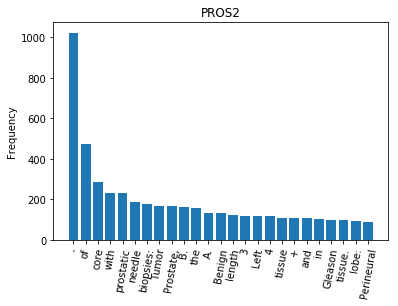



PROS6-BX 

-                  6752
of                 1944
prostatic          1712
Tumor              1641
Benign             1510
tissue.            1404
Left               1275
Right              1275
base:               850
mid:                849
apex:               848
Gleason             668
Perineural          634
score:              611
quantitation:       598
invasion:           594
Predicted           578
identified.         552
Prostatic           548
core                543
Longest             538
confluent           531
needle              528
+                   519
adenocarcinoma.     517
dtype: int64


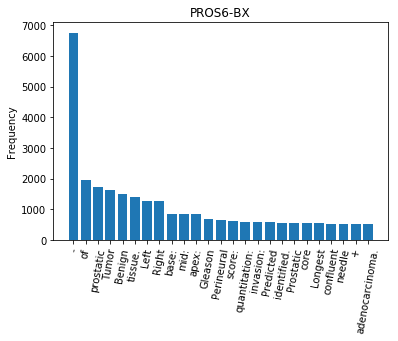



PROS6-BX:DUDBCZSPMKMZTYWDG-QBAQ 

-                2037
of                668
Tumor             568
prostatic         481
tissue.           360
Left              337
Right             333
Benign            327
invasion:         227
apex:             225
Prostatic         224
mid:              223
base:             222
Perineural        210
quantitation:     205
confluent         192
Grade             188
involves          187
Group             179
Gleason           174
in                173
Longest           170
length            165
tumor:            163
mm.               162
dtype: int64


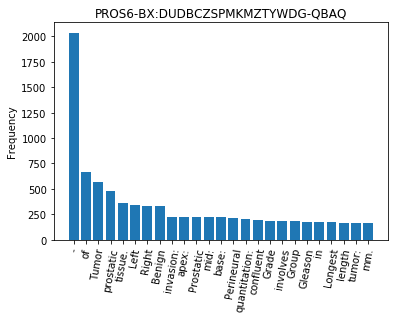



REC 

-              363
for            123
biopsy:        120
Negative       113
with           106
and            100
of              88
Rectum,         85
mucosa          64
chronic         55
or              50
biopsies:       45
dysplasia       43
dysplasia.      43
Rectal          37
Fragments       34
colitis.        32
colonic         32
Colon,          31
malignancy.     29
B.              27
A.              27
active          27
focal           24
No              22
dtype: int64


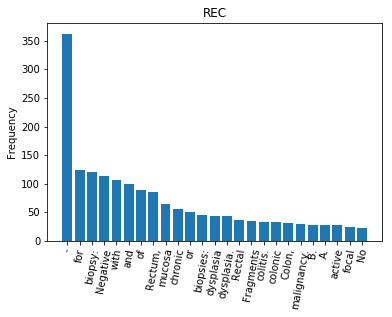



RECT-P 

-               888
Rectal          300
polyp.          279
polyp,          272
polypectomy:    263
Hyperplastic    226
biopsy:         212
of              198
adenoma.        186
hyperplastic    170
and             151
Tubular         145
Fragments       129
Rectum,         119
for             112
Colon,          104
polyp:           94
Negative         89
by               86
polyp            85
was              83
reviewed         83
case             83
This             83
dictated         83
dtype: int64


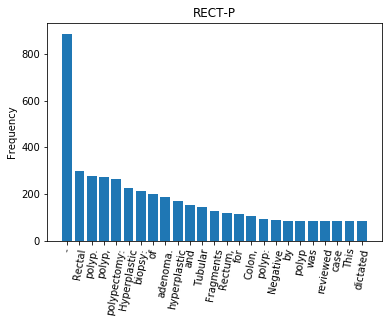



SBRSTNBX 

-               1091
with             376
and              283
breast           249
of               239
core             212
for              164
stereotactic     147
ductal           145
Benign           145
breast,          143
in               139
needle           132
or               127
Left             123
Negative         121
tissue           114
Right            104
are              103
biopsy:          103
atypia            98
fibrocystic       94
benign            93
identified.       91
hyperplasia       90
dtype: int64


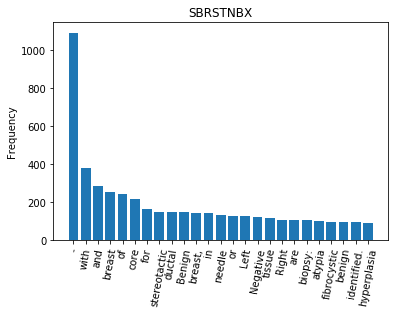



SE-COL-P 

-                 1072
Colon              584
of                 431
Fragments          346
adenoma.           333
and                308
polyp,             303
polypectomy:       302
polyps,            302
polypectomies:     295
STL:sjc:C2NR       266
tubular            235
Tubular            204
transverse,        175
colonic            168
mucosa.            144
A.                 137
B.                 136
adenomas.          128
ascending,         117
hyperplastic       112
polyp.             100
sigmoid,            96
cecum,              92
STL:caw:C2NR        91
dtype: int64


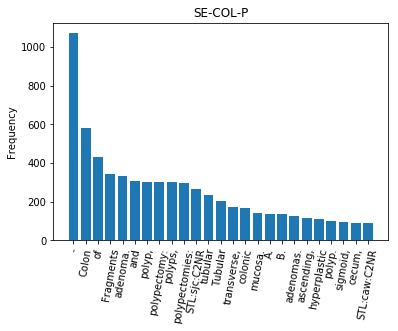



SE-COLBX 

-               506
for             217
Negative        217
and             149
biopsies:       125
colitis.        111
colonic         110
mucosa.         104
chronic          96
Normal           90
granulomas.      86
Colon,           84
A.               71
B.               71
biopsy:          69
dysplasia.       63
with             61
of               58
mucosa           58
STL:sjc:C2NR     54
colitis          51
microscopic      51
Colon            46
Pancolon,        43
Colonic          43
dtype: int64


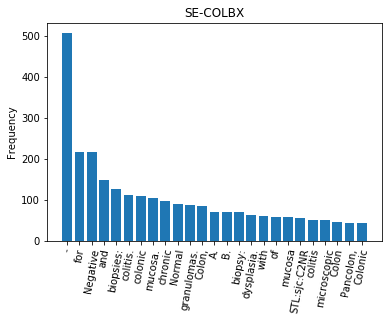



SE-DUOBX 

-             604
for           243
Negative      238
biopsy:       198
mucosa.       157
and           153
Normal        116
intestinal    103
B.             96
A.             96
metaplasia     89
with           83
Duodenum,      82
celiac         81
gastric        80
pylori         78
disease.       78
mucosa         78
H.             76
on             73
Stomach,       71
H&E.           66
C.             65
chronic        62
of             55
dtype: int64


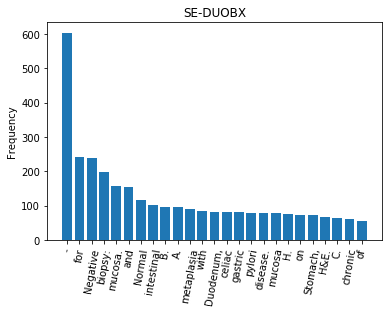



SIG-P 

-               1097
Sigmoid          317
polyp.           293
polypectomy:     290
polyp,           282
of               269
adenoma.         266
sigmoid,         243
biopsy:          240
Tubular          230
Hyperplastic     204
hyperplastic     195
colon            187
Colon            170
Fragments        152
A.               146
B.               146
Colon,           143
polyp:           134
for              134
and              130
with             111
dysplasia        103
polyp            101
Negative         100
dtype: int64


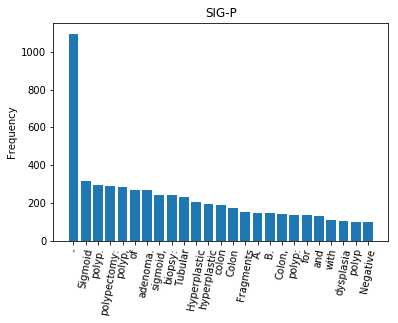



SINUS 

-               771
and             346
of              325
with            271
sinus           242
respiratory     197
contents:       194
chronic         188
mucosa          187
benign          178
bone.           174
Left            159
Benign          156
Right           143
fragments       141
B.              127
A.              127
sinusitis.      111
for             104
Chronic          92
or               90
malignancy.      88
Negative         87
inflammatory     84
inflamed         83
dtype: int64


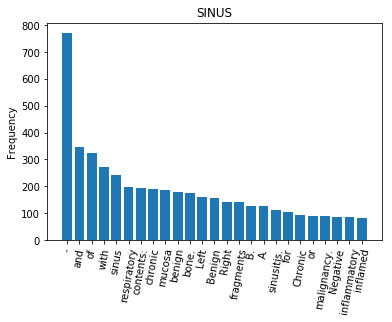



SK-AD 

-                      745
Skin,                  483
biopsy:                463
and                    452
shave                  358
by                     296
case                   281
This                   281
dictated               281
reviewed               281
has                    281
been                   281
Dermatopathologist.    281
at                     247
right                  230
with                   201
left                   200
present                179
lateral                177
melanocytic            154
margin.                153
Ph.D.,                 145
Board                  145
Zhang,                 145
M.D.,                  145
dtype: int64


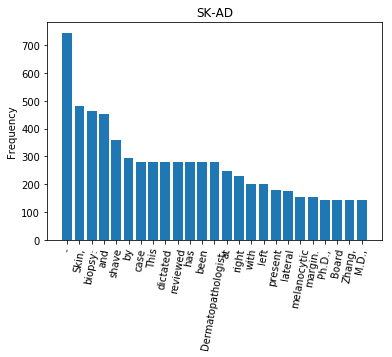



SK-DS 

-                      397
Skin,                  293
biopsy:                268
and                    179
left                   152
punch                  137
(see                   135
Comment).              131
by                     129
shave                  128
right                  124
Dermatopathologist.    121
reviewed               121
This                   121
dictated               121
case                   121
been                   121
has                    121
with                   112
at                      97
lateral                 77
present                 72
D.O.,                   66
Webb,                   66
Board-Certified         66
dtype: int64


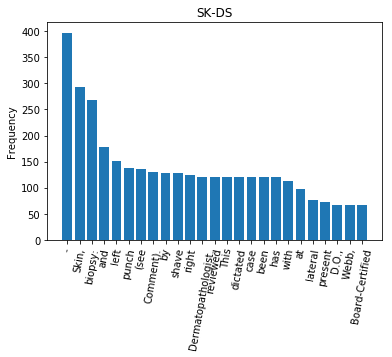



SK-NWD 

-                      1583
Skin,                  1389
biopsy:                1378
and                    1349
shave                  1273
by                      906
reviewed                893
case                    893
has                     892
dictated                892
Dermatopathologist.     892
been                    892
This                    889
at                      834
R.                      735
Alden                   734
D.O.,                   734
Board-Certified         734
Webb,                   710
present                 691
left                    674
lateral                 625
right                   575
cell                    493
deep                    453
dtype: int64


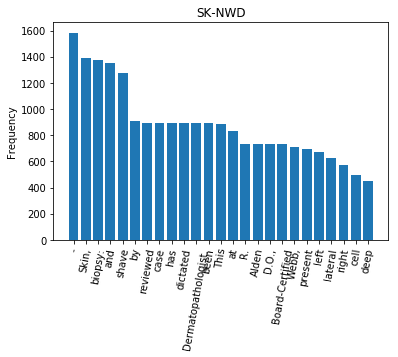



SK-VD 

-                      1036
Skin,                   906
biopsy:                 900
and                     900
shave                   779
by                      585
has                     580
case                    580
Dermatopathologist.     580
reviewed                580
been                    580
dictated                580
This                    579
at                      497
lateral                 439
present                 426
right                   425
left                    382
Alden                   335
Board-Certified         335
R.                      335
D.O.,                   335
Webb,                   334
Ph.D.,                  245
Mancong                 245
dtype: int64


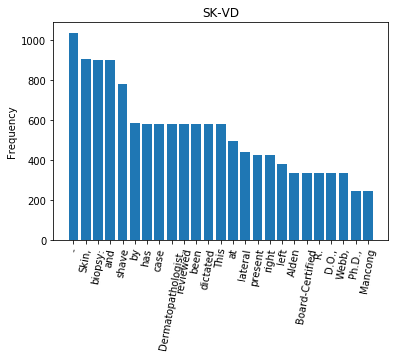



SKC1 

-                      844
Skin,                  461
and                    443
This                   291
case                   291
by                     291
reviewed               291
dictated               290
has                    288
been                   288
Dermatopathologist.    288
excision:              283
cyst.                  247
Board-Certified        236
left                   233
biopsy:                231
right                  229
with                   210
M.D.,                  202
A.                     168
inclusion              139
Benign                 136
of                     108
Herreid,                96
shave                   95
dtype: int64


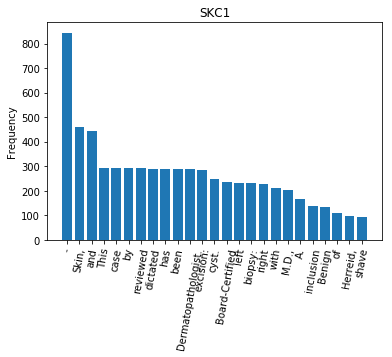



SKD1 

-                      334
Skin,                  298
biopsy:                289
and                    222
shave                  204
by                     167
case                   165
Dermatopathologist.    165
dictated               165
been                   165
reviewed               165
has                    165
This                   163
right                  139
Board-Certified        137
Webb,                  130
Alden                  130
D.O.,                  130
R.                     130
at                     124
left                   121
cell                    87
ARW:smh:C2NR            86
present                 84
punch                   76
dtype: int64


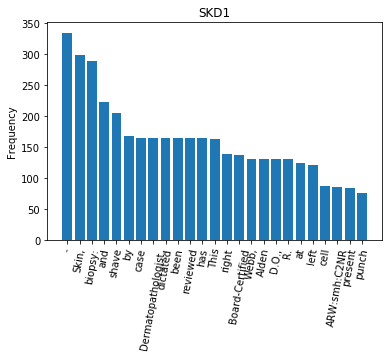



SKO1 

-                      15202
Skin,                   9882
biopsy:                 7797
and                     6684
shave                   4644
by                      4561
This                    4474
reviewed                4464
case                    4461
dictated                4454
been                    4440
has                     4439
Dermatopathologist.     4435
left                    4367
right                   4269
Board-Certified         3620
M.D.,                   3167
at                      3148
with                    3044
the                     2847
A.                      2827
present                 2820
cell                    2792
of                      2633
lateral                 1975
dtype: int64


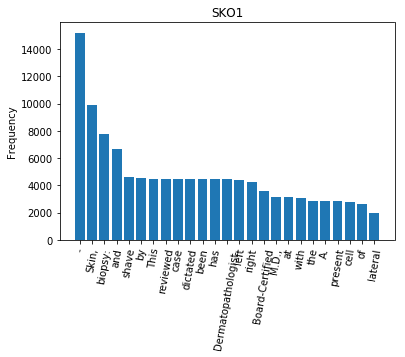



SKO1:YQ7GCLSI5MRLZOQC7UV3DA 

-                      554
Skin,                  427
biopsy:                344
A.                     256
shave                  228
B.                     216
left                   207
and                    199
right                  155
at                     142
present                141
by                     131
case                   126
been                   126
reviewed               126
has                    126
This                   124
dictated               124
Dermatopathologist.    124
the                    115
cell                   115
of                     108
M.D.,                  100
with                    99
lateral                 94
dtype: int64


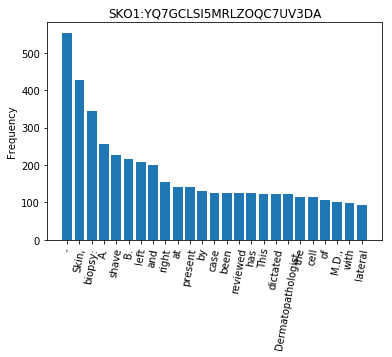



SKO2 

-                      1680
Skin,                   791
excision:               577
and                     516
cell                    480
left                    378
right                   347
by                      346
case                    315
reviewed                315
dictated                314
with                    314
been                    313
Dermatopathologist.     313
has                     313
This                    312
at                      280
residual                278
of                      274
M.D.,                   249
margins                 234
basal                   230
for                     229
lateral                 210
Board-Certified         206
dtype: int64


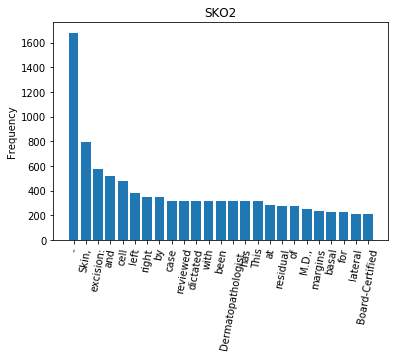



SKO3 

-                      289
Skin,                  134
and                     91
excision:               90
cell                    70
left                    61
right                   56
by                      55
dictated                51
This                    51
case                    51
reviewed                51
been                    50
has                     50
Dermatopathologist.     49
residual                45
with                    44
M.D.,                   44
at                      42
of                      41
margins                 39
Board-Certified         38
carcinoma,              32
not                     32
for                     31
dtype: int64


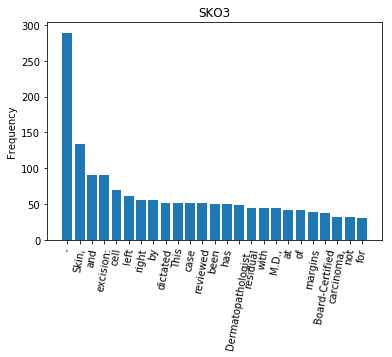



SKO4 

-                      501
Skin,                  133
and                    119
excision:               79
of                      79
with                    71
by                      70
identified.             68
residual                65
left                    62
melanoma                60
in                      59
cell                    58
right                   55
This                    52
reviewed                51
has                     50
dictated                50
Dermatopathologist.     50
case                    50
been                    50
A.                      49
for                     48
M.D.,                   48
Board-Certified         45
dtype: int64


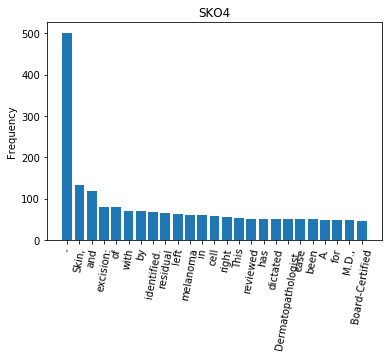



SMB-BX 

-              1084
for             488
Negative        428
biopsy:         347
or              289
with            245
and             213
malignancy.     199
mucosa          189
dysplasia       175
A.              160
B.              159
of              155
biopsies:       139
bowel           125
active          112
Terminal        112
chronic         108
colonic         107
No              102
mucosa.         101
C.               96
ileum,           94
Benign           90
Colon,           89
dtype: int64


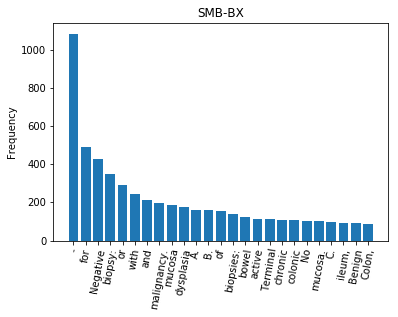



SOFT 

-              762
with           309
excision:      262
and            228
Benign         166
tissue,        160
of             153
tissue         135
Left           122
Soft           122
Right          113
right          107
left           101
biopsy:         84
consistent      83
mass,           80
for             68
cyst.           64
or              63
Skin,           60
Negative        57
A.              57
malignancy.     56
chronic         55
by              54
dtype: int64


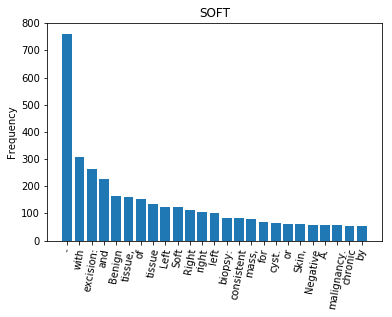



SOFT-O 

-                      809
and                    292
with                   224
tissue,                194
Soft                   178
of                     153
A.                     135
right                  134
left                   124
by                     123
This                   120
Benign                 117
case                   117
has                    116
Board-Certified        116
been                   116
Dermatopathologist.    116
reviewed               116
dictated               115
M.D.,                  114
excision:               95
tissue                  90
Left                    84
biopsy:                 84
Herreid,                83
dtype: int64


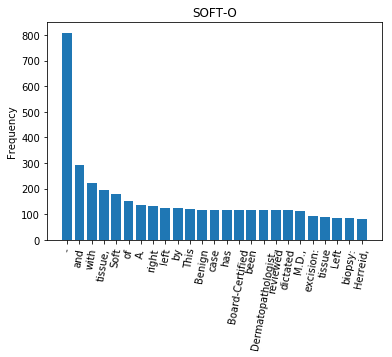



STOMBX 

-               1048
for              450
Negative         389
and              344
biopsy:          295
with             284
mucosa           234
intestinal       224
gastric          196
metaplasia       182
Stomach,         178
pylori           170
chronic          158
A.               143
B.               140
H.               135
mucosa.          132
biopsies:        119
or               118
on               118
of               113
dysplasia.       112
type             100
Helicobacter      97
reactive          95
dtype: int64


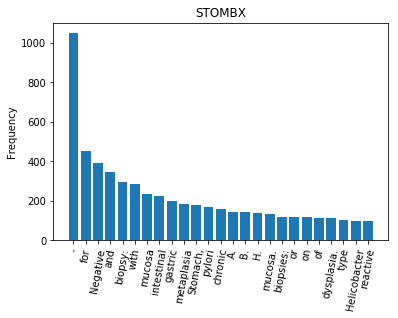



TONG-BX 

-              474
of             338
and            264
is             252
the            247
this           228
tongue:        211
to             198
with           190
report         171
for            165
not            126
ICD-10         123
Right          118
internal       114
information    114
provided       114
lateral        112
Left           105
or              91
squamous        83
cell            72
be              61
will            60
been            60
dtype: int64


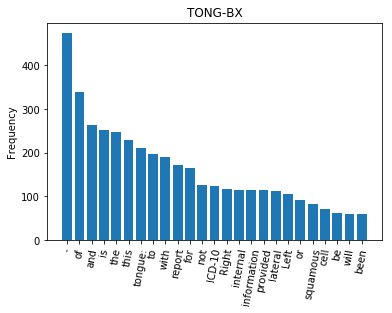



TONS1 

-                 279
with              157
and               139
tonsillectomy:    138
lymphoid          130
hyperplasia.      114
Benign            112
Bilateral          97
hyperplasia        84
follicular         76
tonsils,           70
reactive           62
Tonsils,           60
Follicular         55
DS:mfr             52
acute              42
bilateral          41
tonsillar          40
tissue             40
tonsils            39
palatine           35
consistent         34
for                33
Right              31
tonsillitis.       31
dtype: int64


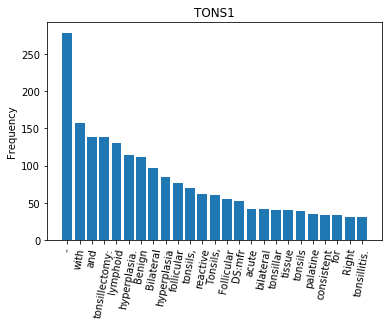



TONSB 

-                 274
and               135
hyperplasia.      127
tonsillectomy:    126
lymphoid          108
with              102
bilateral          96
Benign             93
Tonsils,           81
hyperplasia        55
tonsils,           52
tissue             45
right              44
tonsillar          41
or                 40
No                 38
Reactive           38
chronic            34
Left               31
noted.             29
macroscopic        28
reactive           28
below.             27
surface            27
described          27
dtype: int64


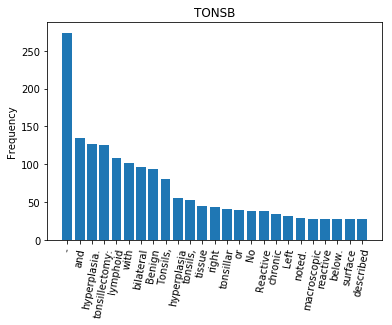



URINBL-BX 

-              680
biopsy:        218
of             162
with           156
urothelial     147
for            119
and            113
Bladder,       109
Bladder         83
bladder         79
No              78
Negative        77
identified.     76
chronic         75
wall,           66
or              65
cystitis.       60
is              60
B.              55
A.              54
propria         53
malignancy.     53
mucosa          48
invasion.       47
Chronic         47
dtype: int64


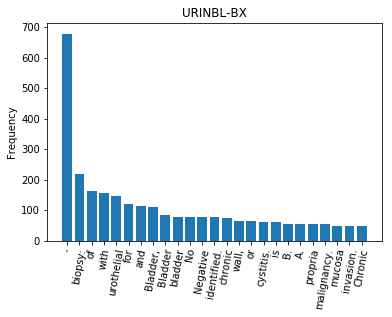



USBRSTNBX 

-                    5725
of                   1359
with                 1244
core                  806
breast                770
score:                770
and                   762
o'clock,              674
needle                649
biopsy:               647
ultrasound-guided     632
breast,               619
tumor                 590
the                   527
3.                    525
in                    518
at                    492
Left                  464
identified.           453
Right                 443
by                    440
carcinoma             436
grade                 428
ductal                418
3                     415
dtype: int64


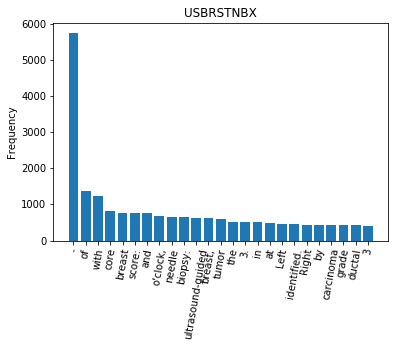



UT/TO-O 

-                1650
and               667
with              510
Benign            491
fallopian         469
bilateral         380
Uterus,           171
hysterectomy      143
tubes             142
tubes,            136
tubes:            128
Cervix:           118
Endometrium:      118
Myometrium:       115
for               113
squamous          112
endometrium.      111
of                111
cervix,           107
Bilateral         106
Uterus            103
benign            100
Unremarkable       98
tubes.             96
proliferative      96
dtype: int64


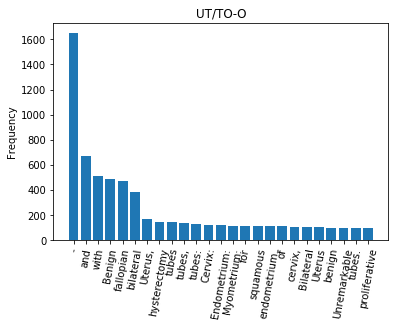



VAGBX 

-              280
biopsy:         85
Vaginal         70
with            68
for             63
squamous        62
and             56
dysplasia       48
of              47
Negative        43
or              41
vaginal         39
Benign          35
malignancy.     34
mucosa          30
A.              21
tissue          20
B.              20
chronic         20
atypia          20
Vagina,         19
Squamous        18
No              18
See             18
the             17
dtype: int64


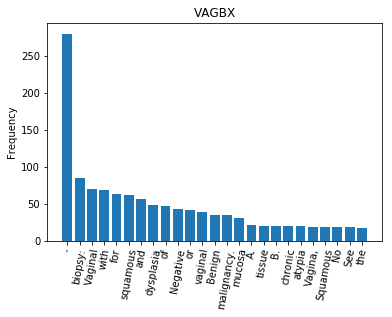



VULVBX 

-              476
biopsy:        197
with           144
and            133
dysplasia       93
for             92
or              90
Vulva,          86
of              69
squamous        66
Negative        62
Skin,           60
vulva,          60
malignancy.     57
chronic         53
Benign          51
No              51
Vulvar          50
See             46
A.              42
by              39
comment.        36
This            35
has             35
mild            35
dtype: int64


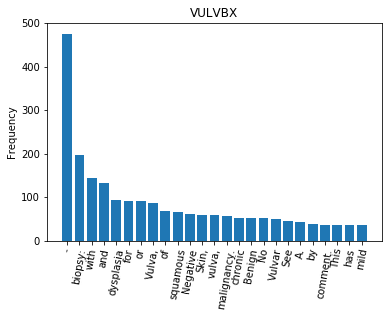



W-ESBX 

-                   525
for                 237
Negative            176
biopsy:             174
with                130
dysplasia.          106
intestinal           92
metaplasia           76
mucosa               73
of                   69
or                   66
and                  63
Esophageal           59
Esophagus,           58
chronic              56
esophageal           53
squamous             52
A.                   52
B.                   52
inflammation.        50
specialized          49
mucosa.              42
negative             42
Benign               41
Gastroesophageal     37
dtype: int64


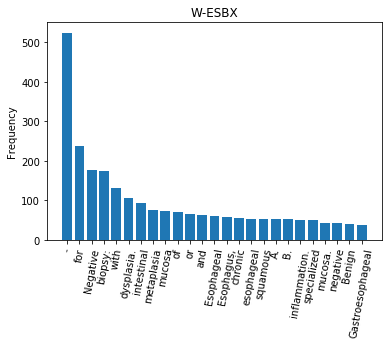

<Figure size 432x288 with 0 Axes>

In [7]:
for label in unique_labels.index:
    print(label,'\n')
    sf = data.sectionValue[label]
    temp = pd.DataFrame({'examCode':sf.index, 'sectionValue':sf.values})
    word_Index = generateWordIndex(temp)
    generateReport(word_Index, label)
    print('\n')
    